In [1]:
import sys
sys.version

%matplotlib inline

In [2]:
!pip3 install fastai==2.0

  Using cached https://files.pythonhosted.org/packages/a2/a3/dc9b0ada3b6b920d6b786110ac3b2ff8a592b7dd08fc9e90045d07e5736c/fastai-2.0.0-py3-none-any.whl
  Found existing installation: fastai 2.0.19
    Uninstalling fastai-2.0.19:
      Successfully uninstalled fastai-2.0.19


In [2]:
#from fastai.vision.all import *
import fastai
print(fastai.__version__) 

2.0.19


In [4]:
!pip3 install nbdev
!pip3 install fastai==2.0.19 fastcore==1.3.2


  Using cached https://files.pythonhosted.org/packages/d8/b0/f1fbf554e0bf3c76e1bdc3b82eedfe41fcf656479586be38c64421082b1b/fastcore-1.3.20-py3-none-any.whl
  Found existing installation: fastcore 1.3.2
    Uninstalling fastcore-1.3.2:
      Successfully uninstalled fastcore-1.3.2
  Using cached https://files.pythonhosted.org/packages/f0/88/81f40a975f0ba71c8c1ef6ef122a9db21d9e43bc482e585b25d9b7c7f4c9/fastai-2.0.19-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f1/66/637874dced27371a0f521c7554bf83658f2ec13a94d64e4db90017973501/fastcore-1.3.2-py3-none-any.whl
ERROR: nbdev 1.1.14 has requirement fastcore>=1.3.19, but you'll have fastcore 1.3.2 which is incompatible.
ERROR: fastrelease 0.1.11 has requirement fastcore>=1.3.13, but you'll have fastcore 1.3.2 which is incompatible.
  Found existing installation: fastcore 1.3.20
    Uninstalling fastcore-1.3.20:
      Successfully uninstalled fastcore-1.3.20
  Found existing installation: fastai 2.0.0
    Uninstalling fa

In [4]:
from fastai.vision.all import *
from nbdev.showdoc import *


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


#FOLDERNAME = 'cs231n/project/UHManoa100/train/Acalypha_hispida'
FOLDERNAME = 'cs231n/project/UHManoa100'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [7]:
bs = 64

In [8]:
p = '/content/drive/MyDrive/{}'.format(FOLDERNAME)
print(p)
from pathlib import Path
str_path = p
path = Path(str_path)
#fnames = get_image_files(p)
#len(fnames)

/content/drive/MyDrive/cs231n/project/UHManoa100


In [9]:
#dls = ImageDataLoaders.from_name_re(
#    path, fnames, pat=r'(.+)\([0-9]+\)_\d+.jpg$', item_tfms=Resize(460), bs=bs,
#    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

data = ImageDataLoaders.from_folder(path, train='train', valid_pct=.2, bs=bs)

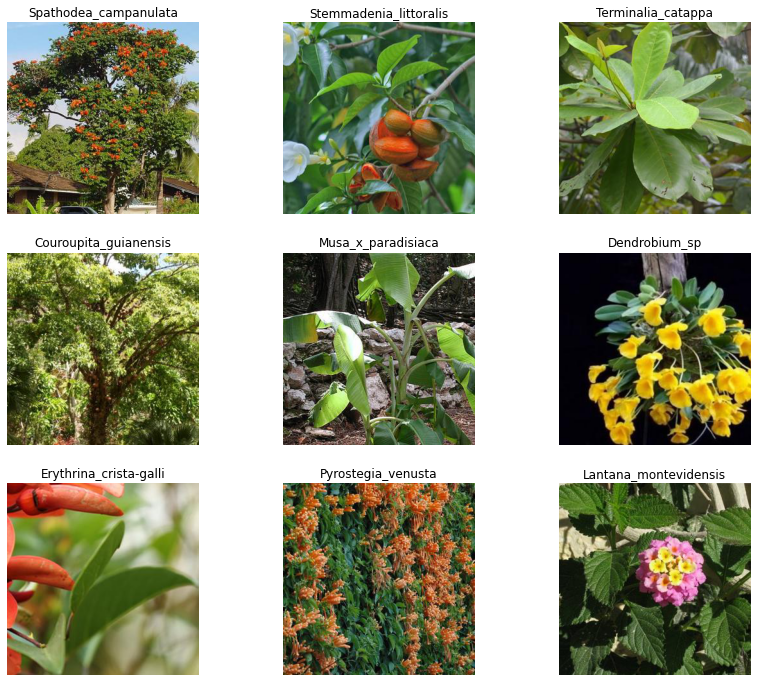

In [10]:
#dls.show_batch(max_n=9, figsize=(7,6))
data.show_batch(max_n=9, figsize=(14,12))

In [11]:
print(data.vocab)
len(data.vocab),data.c

['Acacia_confusa', 'Acalypha_hispida', 'Alocasia_macrorrhiza', 'Aloe_vera', 'Alpinia_purpurata', 'Anthurium_andreanum', 'Azadirachta_indica', 'Bauhinia_variegata', 'Bixa_orellana', 'Blighia_sapida', 'Bombax_glabra', 'Bougainvillea_sp', 'Brugmansia_x_candida', 'Caesalpinia_pulcherrima', 'Calotropis_gigantea', 'Canna_indica', 'Cardamine_flexuosa', 'Cardiospermum_grandiflorum', 'Cascabela_thevetia', 'Cassia_bakeriana', 'Casuarina_equisetifolia', 'Catharanthus_roseus', 'Cattleya_sp', 'Cecropia_obtusifolia', 'Chlorophytum_comosum', 'Clerodendrum_quadriloculare', 'Clitoria_ternatea', 'Cocos_nucifera', 'Codiaeum_variegatum', 'Couroupita_guianensis', 'Crescentia_cujete', 'Crinum_asiaticum', 'Cupressus_sempervirens', 'Cyperus_papyrus', 'Delonix_regia', 'Dendrobium_sp', 'Dichorisandra_thyrsiflora', 'Eichhornia_crassipes', 'Elaeocarpus_grandis', 'Erythrina_crista-galli', 'Eucalyptus_deglupta', 'Eugenia_uniflora', 'Ficus_microcarpa', 'Filicium_decipiens', 'Gardenia_brighamii', 'Gomphrena_globosa',

(102, 102)

In [12]:
import torchvision.models as TorchModels
learn = cnn_learner(data, TorchModels.googlenet, metrics=accuracy).to_fp16()

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (2): BasicConv2d(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): BasicConv2d(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (5): Inception(
      (branch1): BasicConv2d(
        (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.081770,1.298189,0.678031,1:52:15
1,1.128978,0.595764,0.825674,03:11
2,0.732499,0.358644,0.879039,03:08
3,0.562713,0.320811,0.883190,03:08


In [15]:
learn.save('googlenet-1')

Path('/content/drive/MyDrive/cs231n/project/UHManoa100/models/googlenet-1.pth')

In [16]:
#loading the saved model
model_path = "/content/drive/MyDrive/cs231n/project/UHManoa100/models/googlenet-1"

learn.load(model_path)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

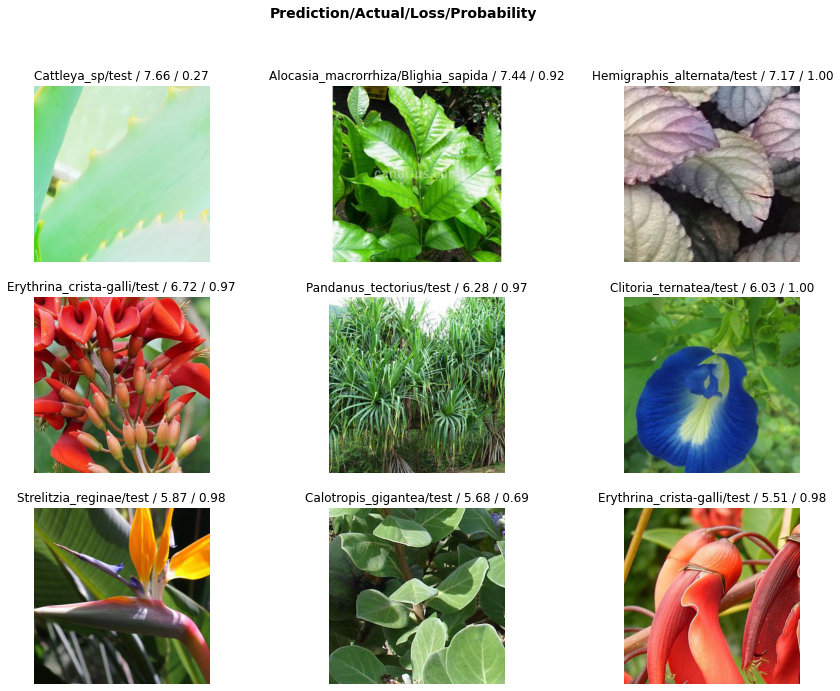

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

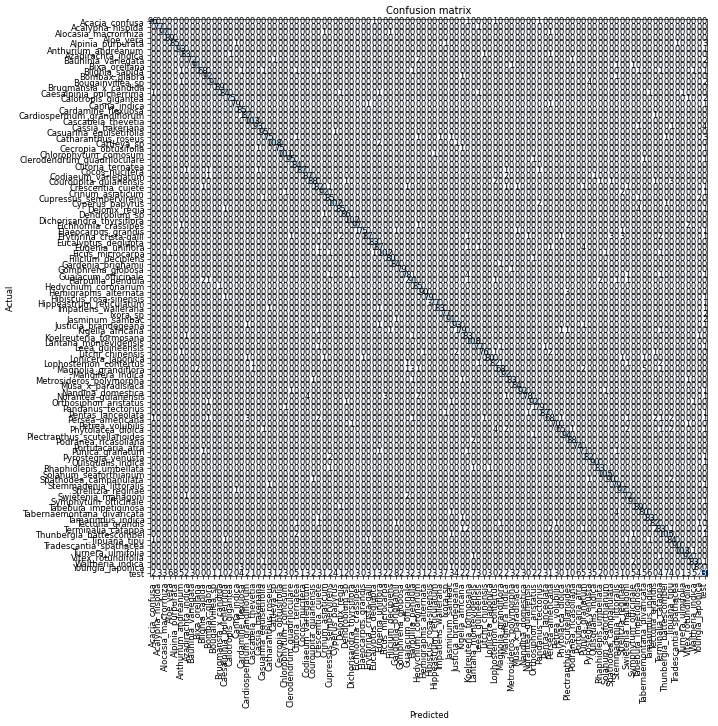

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:

interp.most_confused(min_val=2)

[('test', 'Alpinia_purpurata', 8),
 ('test', 'Gardenia_brighamii', 8),
 ('test', 'Ixora_sp', 7),
 ('test', 'Lantana_montevidensis', 7),
 ('test', 'Thunbergia_battescombei', 7),
 ('test', 'Aloe_vera', 6),
 ('test', 'Portulacaria_afra', 6),
 ('test', 'Tamarindus_indica', 6),
 ('Magnolia_grandiflora', 'Tabernaemontana_divaricata', 5),
 ('test', 'Anthurium_andreanum', 5),
 ('test', 'Clitoria_ternatea', 5),
 ('test', 'Punica_granatum', 5),
 ('test', 'Quisqualis_indica', 5),
 ('test', 'Symphytum_officinale', 5),
 ('test', 'Tabernaemontana_divaricata', 5),
 ('test', 'Waltheria_indica', 5),
 ('Bougainvillea_sp', 'Pyrostegia_venusta', 4),
 ('Cassia_bakeriana', 'test', 4),
 ('Delonix_regia', 'Tabebuia_impetiginosa', 4),
 ('Eugenia_uniflora', 'Punica_granatum', 4),
 ('Guaiacum_officinale', 'Koelreuteria_formosana', 4),
 ('Norantea_guianensis', 'Codiaeum_variegatum', 4),
 ('Phytolacca_dioica', 'Lophostemon_confertus', 4),
 ('Tabernaemontana_divaricata', 'Stemmadenia_littoralis', 4),
 ('test', 'Car

In [ ]:

learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.588861,0.282185,0.929834,02:19


In [ ]:
learn.load('googlenet-1');

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=3.311311274956097e-06)

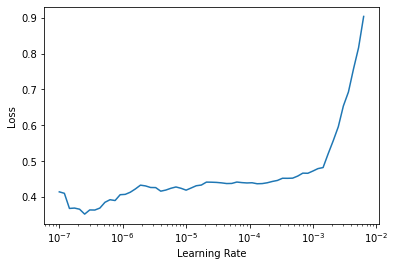

In [ ]:

learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.439125,0.250849,0.938722,02:12
1,0.428152,0.241807,0.941755,02:12
